In [1]:
import os
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
CLASS_NAME_TO_ID = {'Bus': 0, 'Truck': 1}
CLASS_ID_TO_NAME = {0: 'Bus', 1: 'Truck'}

In [4]:
data_dir = "./Detection/"
data_df = pd.read_csv(os.path.join(data_dir, "df.csv"))
data_df

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
0,0000599864fd15b3,xclick,Bus,1,0.343750,0.908750,0.156162,0.650047,1,0,...,0,0,0.421875,0.343750,0.795000,0.908750,0.156162,0.512700,0.650047,0.457197
1,00006bdb1eb5cd74,xclick,Truck,1,0.276667,0.697500,0.141604,0.437343,1,0,...,0,0,0.299167,0.276667,0.697500,0.659167,0.141604,0.241855,0.352130,0.437343
2,00006bdb1eb5cd74,xclick,Truck,1,0.702500,0.999167,0.204261,0.409774,1,1,...,0,0,0.849167,0.702500,0.906667,0.999167,0.204261,0.398496,0.409774,0.295739
3,00010bf498b64bab,xclick,Bus,1,0.156250,0.371250,0.269188,0.705228,0,0,...,0,0,0.274375,0.371250,0.311875,0.156250,0.269188,0.493882,0.705228,0.521691
4,00013f14dd4e168f,xclick,Bus,1,0.287500,0.999375,0.194184,0.999062,0,1,...,0,0,0.920000,0.999375,0.648750,0.287500,0.194184,0.303940,0.999062,0.523452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24057,fff2b15ad6007d0e,activemil,Truck,1,0.277344,0.622656,0.226389,0.859722,0,0,...,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
24058,fff376d20410e4c9,xclick,Bus,1,0.295625,0.558750,0.306667,0.397500,1,0,...,1,0,0.424375,0.316250,0.295625,0.558750,0.306667,0.397500,0.382500,0.335833
24059,fff376d20410e4c9,xclick,Bus,1,0.348125,0.701250,0.423333,0.744167,0,0,...,1,0,0.478750,0.493125,0.348125,0.701250,0.423333,0.744167,0.537500,0.523333
24060,fffde5953a818927,xclick,Bus,1,0.277500,0.605625,0.565000,0.795833,0,0,...,0,0,0.488125,0.277500,0.517500,0.605625,0.565000,0.670000,0.795833,0.704167


In [5]:
index = 0
image_files = [fn for fn in os.listdir("./Detection/images/") if fn.endswith("jpg")]
image_file = image_files[index]
image_file

'63908fdf1f3d13fe.jpg'

In [6]:
image_path = os.path.join("./Detection/images/", image_file)
image_path

'./Detection/images/63908fdf1f3d13fe.jpg'

In [7]:
import cv2
import matplotlib.pyplot as plt

In [8]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)

(192, 256, 3)


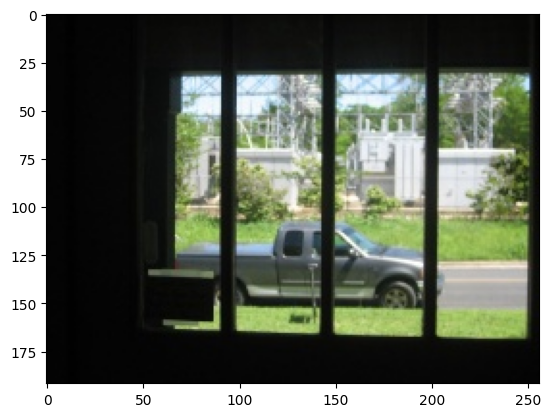

In [9]:
plt.imshow(image)

In [10]:
image_id = image_file.split('.')[0]
image_id

'63908fdf1f3d13fe'

In [11]:
meta_data = data_df[data_df['ImageID'] == image_id]
meta_data

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
10070,63908fdf1f3d13fe,xclick,Truck,1,0.259375,0.813125,0.549167,0.799167,1,0,...,0,0,0.50875,0.259375,0.386875,0.813125,0.549167,0.659167,0.799167,0.723333


In [12]:
cate_names = meta_data['LabelName'].values
cate_names

array(['Truck'], dtype=object)

In [13]:
bboxes = meta_data[['XMin', 'XMax', 'YMin', 'YMax']].values
bboxes

array([[0.259375, 0.813125, 0.549167, 0.799167]])

In [14]:
img_h, img_w, img_c = image.shape

class_ids = [CLASS_NAME_TO_ID[cate_name] for cate_name in cate_names ]
class_ids

[1]

In [15]:
unnorm_bboxes = bboxes.copy()
# 'XMin', 'YMin', 'XMax', 'YMax' 순서로 바꿔주기.
unnorm_bboxes[:, [1,2]] = unnorm_bboxes[:, [2,1]]
# xmax, ymax = xmax-xmin, ymax-ymin => xmax=w, ymax=h
unnorm_bboxes[:, 2:4] -= unnorm_bboxes[:, 0:2]
# xmin, ymin -> x_cen, y_cen = x_min + w/2, y_min + h/2
unnorm_bboxes[:, 0:2] += (unnorm_bboxes[:, 2:4] / 2)

# (x_cen, w) / image_w
# (y_cen, h) / image_h
unnorm_bboxes[:, [0,2]] *= img_w
unnorm_bboxes[:, [1,3]] *= img_h

unnorm_bboxes

array([[137.28    , 129.440064, 141.76    ,  48.      ]])

In [16]:
BOX_COLOR = {'Bus':(200, 0, 0), 'Truck':(0, 0, 200)}

def visualize_bbox(image, bbox, class_name, color=BOX_COLOR, thickness=2):
    x_center, y_center, w, h = bbox
    x_min = int(x_center - w/2)
    y_min = int(y_center - h/2)
    x_max = int(x_center + w/2)
    y_max = int(y_center + h/2)
    
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color=color[class_name], thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(image, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), color[class_name], -1)
    cv2.putText(
        image,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=(255, 255, 255), 
        lineType=cv2.LINE_AA,
    )
    return image


def visualize(image, bboxes, category_ids):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = CLASS_ID_TO_NAME[category_id]
        img = visualize_bbox(img, bbox, class_name)
    return img

In [17]:
canvas = visualize(image, unnorm_bboxes, class_ids)

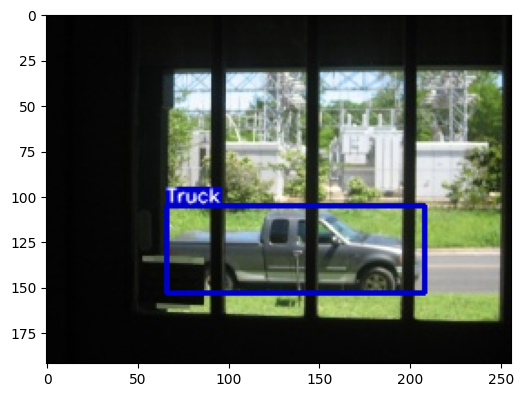

In [18]:
plt.figure(figsize=(6,6))
plt.imshow(canvas)
plt.show()

전체 이미지에 대해서 시각화를 해보자.

In [19]:
from ipywidgets import interact

In [21]:
@interact(index=(0, 20))
def show_sample(index=0):
    image_file = image_files[index]
    image_path = os.path.join("./Detection/images/", image_file)

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    image_id = image_file.split('.')[0]
    meta_data = data_df[data_df['ImageID'] == image_id]
    cate_names = meta_data['LabelName'].values
    bboxes = meta_data[['XMin', 'XMax', 'YMin', 'YMax']].values

    img_h, img_w, _ = image.shape

    class_ids = [CLASS_NAME_TO_ID[cate_name] for cate_name in cate_names ]
    unnorm_bboxes = bboxes.copy()
    unnorm_bboxes[:, [1,2]] = unnorm_bboxes[:, [2,1]]
    unnorm_bboxes[:, 2:4] -= unnorm_bboxes[:, 0:2]
    unnorm_bboxes[:, 0:2] += (unnorm_bboxes[:, 2:4] / 2)
    unnorm_bboxes[:, [0,2]] *= img_w
    unnorm_bboxes[:, [1,3]] *= img_h

    canvas = visualize(image, unnorm_bboxes, class_ids)

    plt.figure(figsize=(6,6))
    plt.imshow(canvas)
    plt.show()

interactive(children=(IntSlider(value=0, description='index', max=20), Output()), _dom_classes=('widget-intera…